# Comprehensive Data Exploration and Cleaning: ABS QBIS Dataset

**Description:** This Jupyter Notebook provides a detailed exploration and cleaning of the "ABS QBIS Dataset," focusing on uncovering insights and preparing the data for downstream machine learning tasks. The notebook includes:

- Basic data overview, including structure, column types, and missing value analysis.
- Statistical summaries and visualizations for numerical and categorical variables.
- Correlation analysis to identify relationships between numerical features.
- Handling missing values, removing unnecessary columns, and cleaning textual data.
- Preparing the cleaned dataset for training machine learning models, including train-validation splits and export options.
- The notebook is designed to be adaptable, providing a robust framework for exploratory data analysis (EDA) and ensuring the dataset is ready for advanced analytics or modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'ABS,QBIS,1.0.0+all.csv' 
data = pd.read_csv(file_path)

In [3]:
data.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,MEASURE,Measure,PRICE_ADJUSTMENT,Price Adjustment,INDUSTRY,Industry,...,OBS_VALUE,Observation Value,UNIT_MEASURE,Unit of Measure,UNIT_MULT,Unit of Multiplier,OBS_STATUS,Observation Status,OBS_COMMENT,Observation Comment
0,DATAFLOW,ABS:QBIS(1.0.0),Business Indicators,I,M10,Profit before Income Tax quarterly percentage ...,CUR,Current Price,J,Information Media and Telecommunications,...,NaN,NaN,PCT,Percent,0,Units,u,not applicable,NaN,NaN
1,DATAFLOW,ABS:QBIS(1.0.0),Business Indicators,I,M10,Profit before Income Tax quarterly percentage ...,CUR,Current Price,J,Information Media and Telecommunications,...,NaN,NaN,PCT,Percent,0,Units,q,not available,NaN,NaN
2,DATAFLOW,ABS:QBIS(1.0.0),Business Indicators,I,M10,Profit before Income Tax quarterly percentage ...,CUR,Current Price,J,Information Media and Telecommunications,...,NaN,NaN,PCT,Percent,0,Units,q,not available,NaN,NaN
3,DATAFLOW,ABS:QBIS(1.0.0),Business Indicators,I,M10,Profit before Income Tax quarterly percentage ...,CUR,Current Price,J,Information Media and Telecommunications,...,NaN,NaN,PCT,Percent,0,Units,q,not available,NaN,NaN
4,DATAFLOW,ABS:QBIS(1.0.0),Business Indicators,I,M10,Profit before Income Tax quarterly percentage ...,CUR,Current Price,J,Information Media and Telecommunications,...,NaN,NaN,PCT,Percent,0,Units,q,not available,NaN,NaN


In [6]:
# 1. Basic Data Exploration
print("Basic Information about the Dataset:")
print(data.info())

print("\nFirst Few Rows of the Dataset:")
print(data.head())

print("\nColumn Names and Data Types:")
print(data.dtypes)

print("\nSummary Statistics of Numerical Columns:")
print(data.describe())

print("\nSummary of Categorical Columns:")
categorical_columns = data.select_dtypes(include=['object']).columns
print(data[categorical_columns].describe())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   STRUCTURE            138593 non-null  object 
 1   STRUCTURE_ID         138593 non-null  object 
 2   STRUCTURE_NAME       138593 non-null  object 
 3   ACTION               138593 non-null  object 
 4   MEASURE              138593 non-null  object 
 5   Measure              138593 non-null  object 
 6   PRICE_ADJUSTMENT     138593 non-null  object 
 7   Price Adjustment     138593 non-null  object 
 8   INDUSTRY             138593 non-null  object 
 9   Industry             138593 non-null  object 
 10  SCOPE                138593 non-null  object 
 11  Business Scope       138593 non-null  object 
 12  TSEST                138593 non-null  int64  
 13  Adjustment Type      138593 non-null  object 
 14  REGION               138593 non

In [7]:
# Check for missing values
print("\nMissing Values in Each Column:")
missing_data = data.isnull().sum()
print(missing_data)

# Percentage of missing values
missing_percentage = (missing_data / len(data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values in Each Column:
STRUCTURE                   0
STRUCTURE_ID                0
STRUCTURE_NAME              0
ACTION                      0
MEASURE                     0
Measure                     0
PRICE_ADJUSTMENT            0
Price Adjustment            0
INDUSTRY                    0
Industry                    0
SCOPE                       0
Business Scope              0
TSEST                       0
Adjustment Type             0
REGION                      0
Region                      0
FREQ                        0
Frequency                   0
TIME_PERIOD                 0
Time Period            138593
OBS_VALUE               28149
Observation Value      138593
UNIT_MEASURE                0
Unit of Measure             0
UNIT_MULT                   0
Unit of Multiplier          0
OBS_STATUS             108930
Observation Status     108930
OBS_COMMENT            138277
Observation Comment    138593
dtype: int64

Percentage of Missing Values:
STRUCTURE               

In [8]:
# Column Names and Types
print("\nColumn Names and Data Types:")
print(data.dtypes)


Column Names and Data Types:
STRUCTURE               object
STRUCTURE_ID            object
STRUCTURE_NAME          object
ACTION                  object
MEASURE                 object
Measure                 object
PRICE_ADJUSTMENT        object
Price Adjustment        object
INDUSTRY                object
Industry                object
SCOPE                   object
Business Scope          object
TSEST                    int64
Adjustment Type         object
REGION                  object
Region                  object
FREQ                    object
Frequency               object
TIME_PERIOD             object
Time Period            float64
OBS_VALUE              float64
Observation Value      float64
UNIT_MEASURE            object
Unit of Measure         object
UNIT_MULT                int64
Unit of Multiplier      object
OBS_STATUS              object
Observation Status      object
OBS_COMMENT             object
Observation Comment    float64
dtype: object


In [9]:
# 2. Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
for column in categorical_columns:
    print(f"\nColumn: {column}")
    print(data[column].unique()[:10])  # Show up to 10 unique values


Unique Values in Categorical Columns:

Column: STRUCTURE
['DATAFLOW']

Column: STRUCTURE_ID
['ABS:QBIS(1.0.0)']

Column: STRUCTURE_NAME
['Business Indicators']

Column: ACTION
['I']

Column: MEASURE
['M10' 'M2' 'M7' 'M6' 'M3' 'M4' 'M8' 'M1' 'M12' 'M5']

Column: Measure
['Profit before Income Tax quarterly percentage change'
 'Sales quarterly percentage change' 'Gross Operating Profits'
 'Wages quarterly percentage change' 'Inventories'
 'Inventories quarterly percentage change'
 'Gross Operating Profits quarterly percentage change' 'Sales'
 'Sales to wages ratio' 'Wages']

Column: PRICE_ADJUSTMENT
['CUR' 'CVM']

Column: Price Adjustment
['Current Price' 'Chain Volume Measures']

Column: INDUSTRY
['J' 'F' 'TOT' 'D' 'M' 'P' 'H' 'R' 'N' 'G']

Column: Industry
['Information Media and Telecommunications' 'Wholesale Trade'
 'All Industries' 'Electricity, Gas, Water and Waste Services'
 'Professional, Scientific and Technical Services'
 'Education and Training' 'Accommodation and Food Servic

In [10]:
# 3. Dropping Unnecessary Columns 
# Columns with high missing percentages (threshold >50%)
columns_to_drop = missing_percentage[missing_percentage > 50].index
print(f"\nDropping Columns with >50% Missing Values: {list(columns_to_drop)}")
data = data.drop(columns=columns_to_drop, errors='ignore')


Dropping Columns with >50% Missing Values: ['Time Period', 'Observation Value', 'OBS_STATUS', 'Observation Status', 'OBS_COMMENT', 'Observation Comment']



Analyzing Numerical Columns:

Statistics for 'TSEST':
count    138593.000000
mean         18.322931
std           8.338118
min          10.000000
25%          10.000000
50%          20.000000
75%          30.000000
max          30.000000
Name: TSEST, dtype: float64


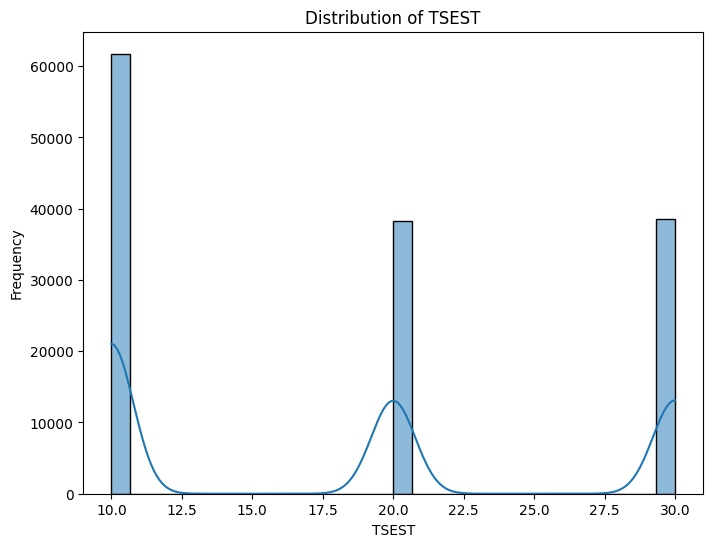


Statistics for 'OBS_VALUE':
count    110444.000000
mean       9651.691603
std       27815.367682
min      -15095.300000
25%           0.000000
50%           7.900000
75%        3662.250000
max      303737.000000
Name: OBS_VALUE, dtype: float64


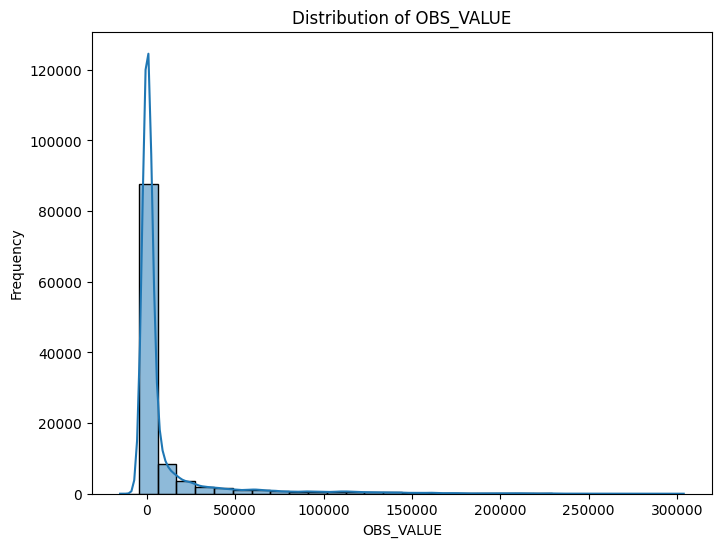


Statistics for 'UNIT_MULT':
count    138593.000000
mean          2.661953
std           2.980904
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max           6.000000
Name: UNIT_MULT, dtype: float64


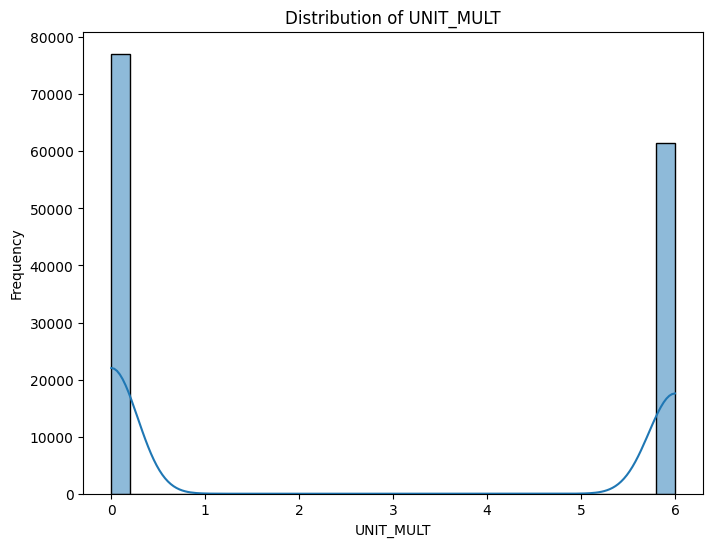

In [11]:
# 4. Analyze Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nAnalyzing Numerical Columns:")
for column in numerical_columns:
    print(f"\nStatistics for '{column}':")
    print(data[column].describe())

    # Plot distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


Analyzing Categorical Columns:

Value Counts for 'STRUCTURE':
STRUCTURE
DATAFLOW    138593
Name: count, dtype: int64


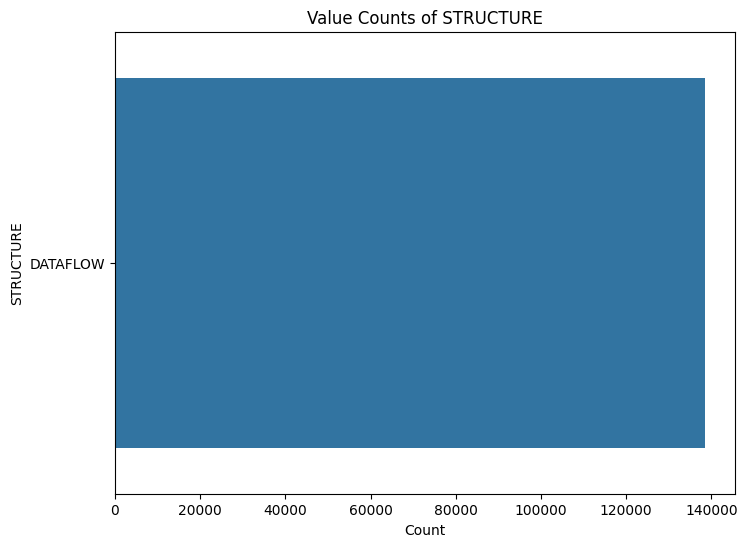


Value Counts for 'STRUCTURE_ID':
STRUCTURE_ID
ABS:QBIS(1.0.0)    138593
Name: count, dtype: int64


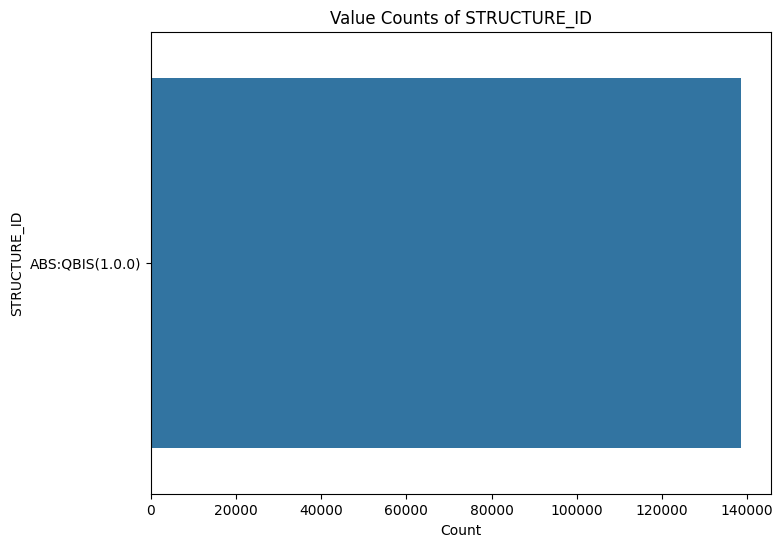


Value Counts for 'STRUCTURE_NAME':
STRUCTURE_NAME
Business Indicators    138593
Name: count, dtype: int64


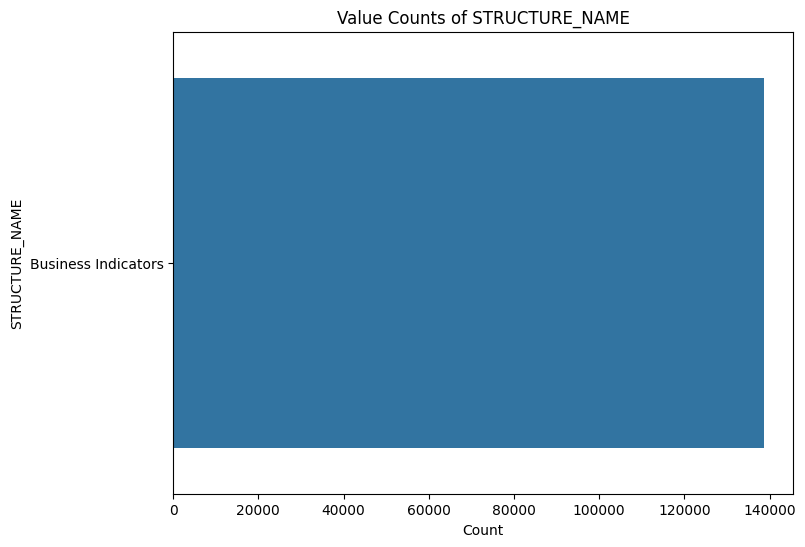


Value Counts for 'ACTION':
ACTION
I    138593
Name: count, dtype: int64


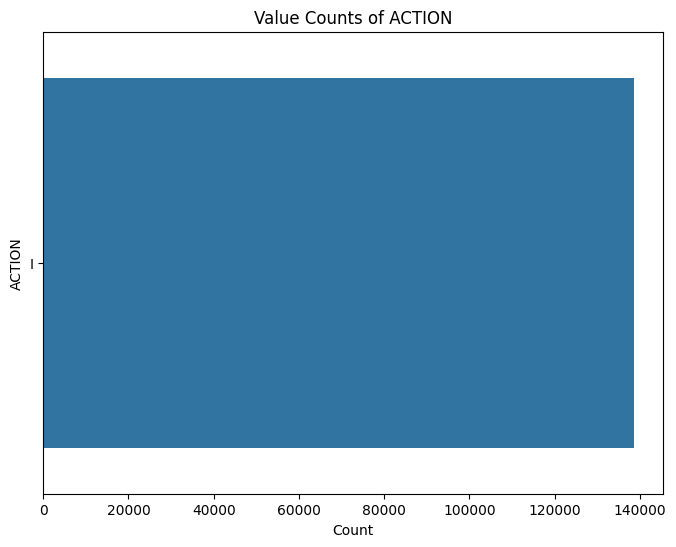


Value Counts for 'MEASURE':
MEASURE
M8     21698
M7     19280
M2     15267
M1     14175
M4     13398
M3     11107
M6     10382
M5      9152
M10     7774
M9      7774
M12     2916
M13     2916
M11     2754
Name: count, dtype: int64


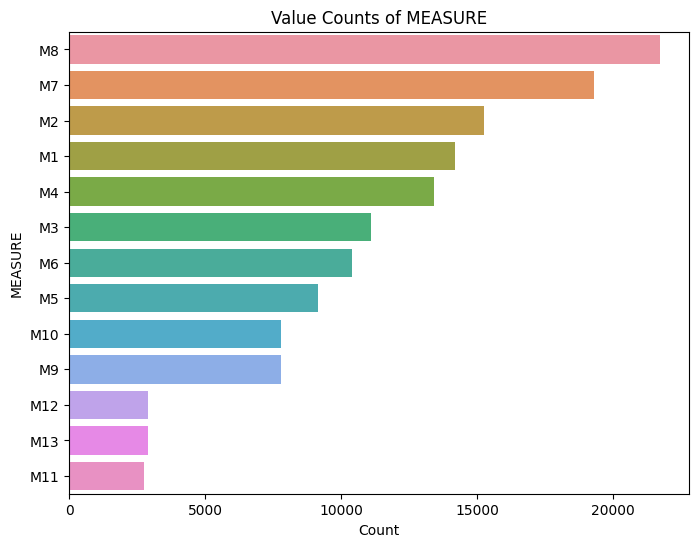


Value Counts for 'Measure':
Measure
Gross Operating Profits quarterly percentage change     21698
Gross Operating Profits                                 19280
Sales quarterly percentage change                       15267
Sales                                                   14175
Inventories quarterly percentage change                 13398
Inventories                                             11107
Wages quarterly percentage change                       10382
Wages                                                    9152
Profit before Income Tax quarterly percentage change     7774
Profit before Income Tax                                 7774
Sales to wages ratio                                     2916
Gross operating profit to sales ratio                    2916
Inventories to sales ratio                               2754
Name: count, dtype: int64


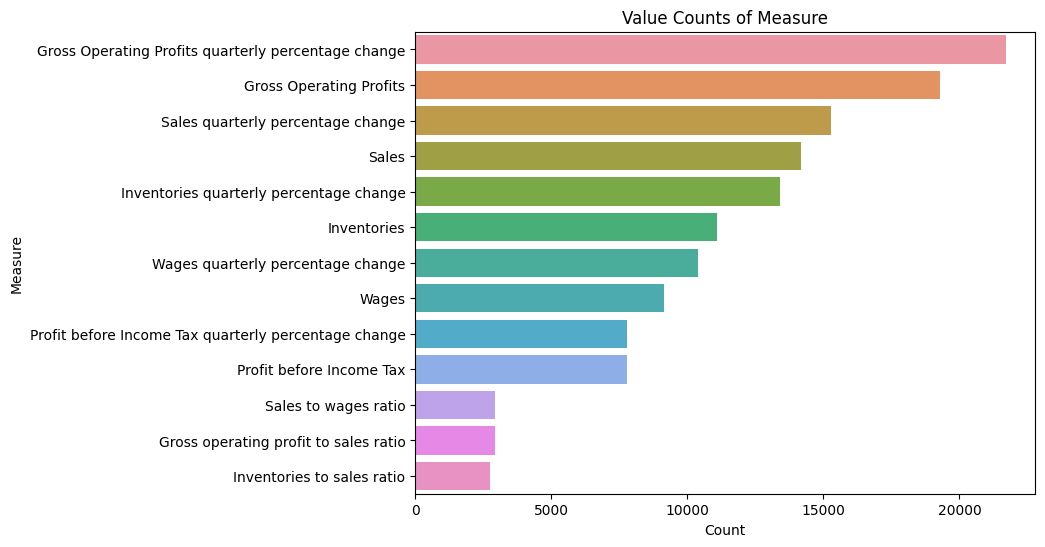


Value Counts for 'PRICE_ADJUSTMENT':
PRICE_ADJUSTMENT
CUR    116207
CVM     22386
Name: count, dtype: int64


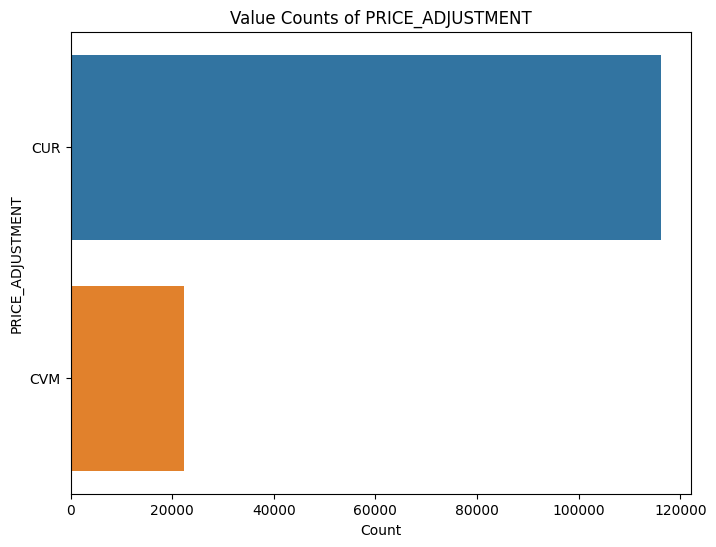


Value Counts for 'Price Adjustment':
Price Adjustment
Current Price            116207
Chain Volume Measures     22386
Name: count, dtype: int64


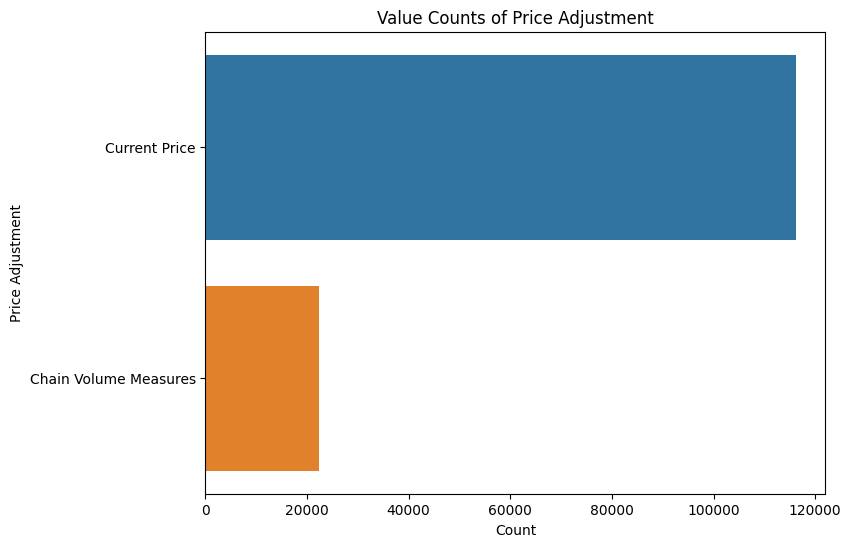


Value Counts for 'INDUSTRY':
INDUSTRY
TOT    17458
B       8712
C       8526
F       8486
H       8358
D       8342
G       8192
K       7661
J       7383
I       6927
N       6855
R       6855
M       6855
L       6855
S       6855
E       6799
Q       3737
P       3737
Name: count, dtype: int64


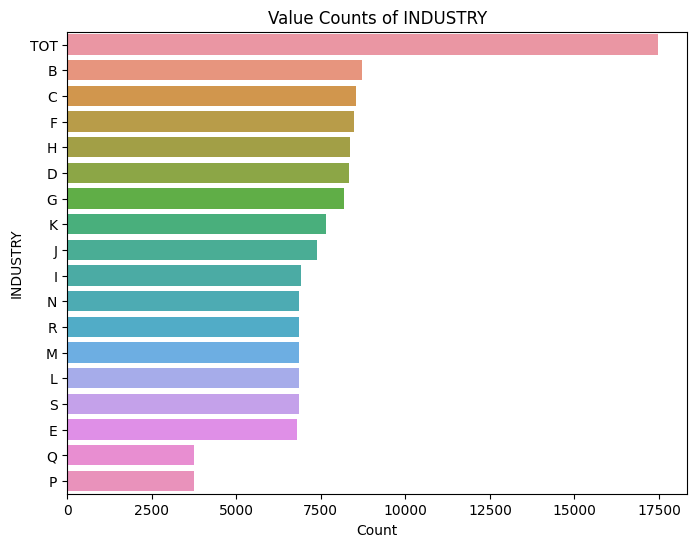


Value Counts for 'Industry':
Industry
All Industries                                     17458
Mining                                              8712
Manufacturing                                       8526
Wholesale Trade                                     8486
Accommodation and Food Services                     8358
Electricity, Gas, Water and Waste Services          8342
Retail Trade                                        8192
Financial and Insurance Services                    7661
Information Media and Telecommunications            7383
Transport, Postal and Warehousing                   6927
Administrative and Support Services                 6855
Arts and Recreation Services                        6855
Professional, Scientific and Technical Services     6855
Rental, Hiring and Real Estate Services             6855
Other Services                                      6855
Construction                                        6799
Health Care and Social Assistance                

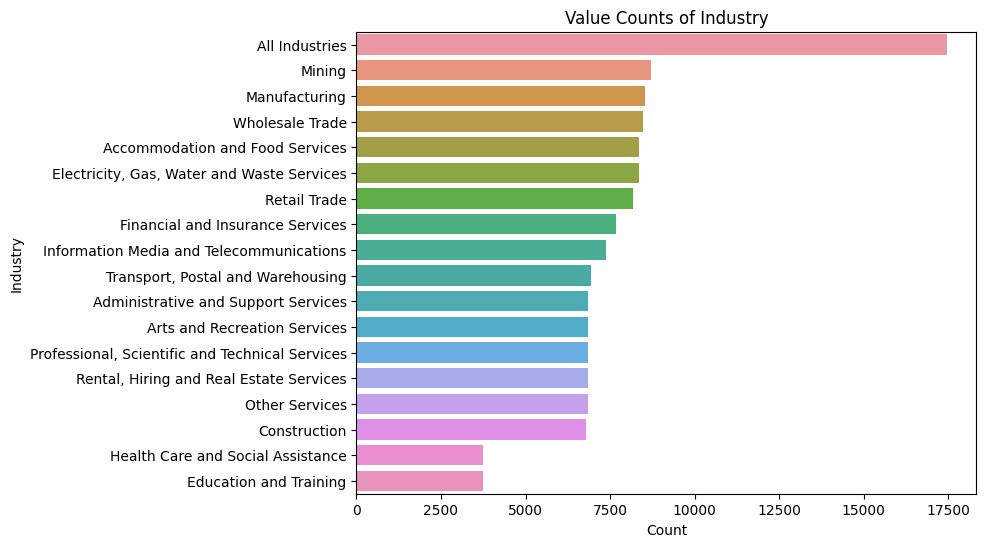


Value Counts for 'SCOPE':
SCOPE
TOT    95767
2      30110
3      12716
Name: count, dtype: int64


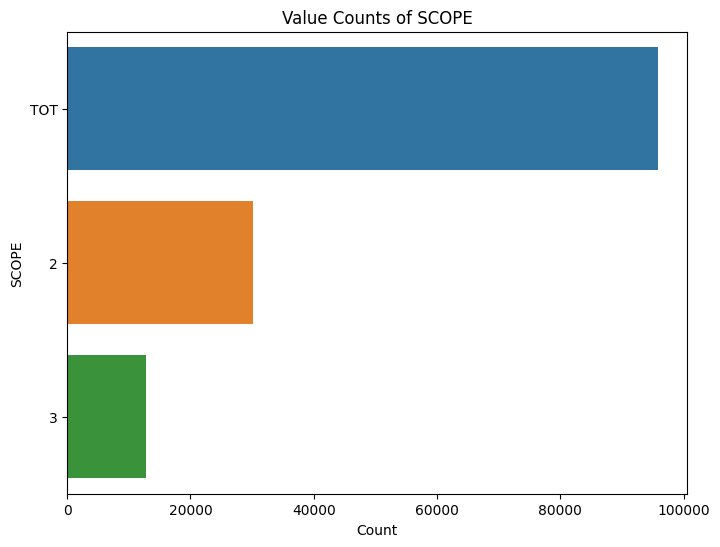


Value Counts for 'Business Scope':
Business Scope
TOTAL       95767
CORP        30110
UNINCORP    12716
Name: count, dtype: int64


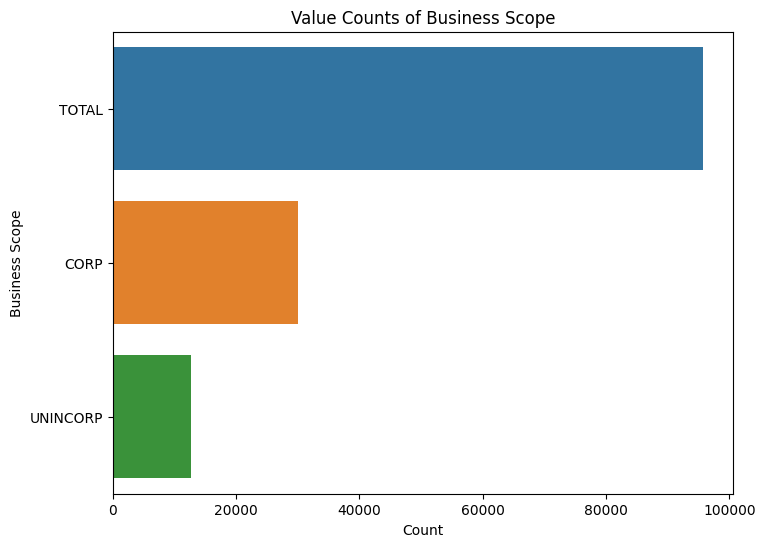


Value Counts for 'Adjustment Type':
Adjustment Type
Original               61748
Trend                  38505
Seasonally Adjusted    38340
Name: count, dtype: int64


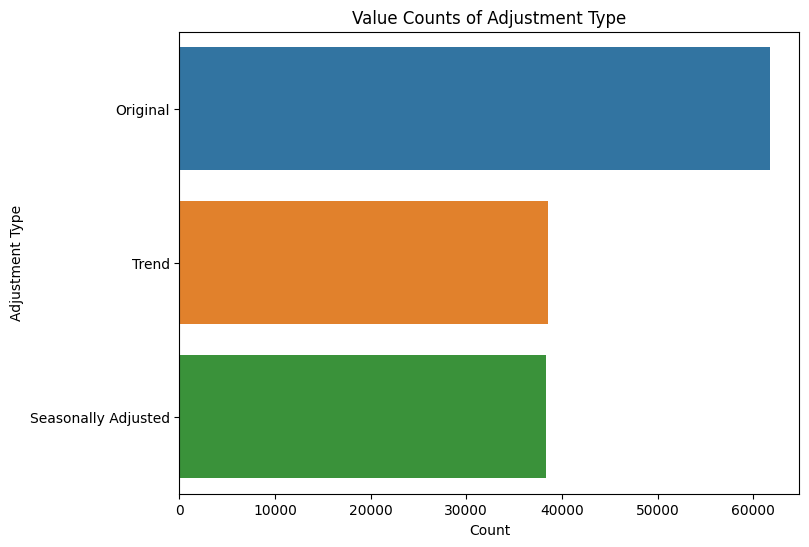


Value Counts for 'REGION':
REGION
AUS    127329
7        1408
4        1408
1        1408
2        1408
8        1408
3        1408
6        1408
5        1408
Name: count, dtype: int64


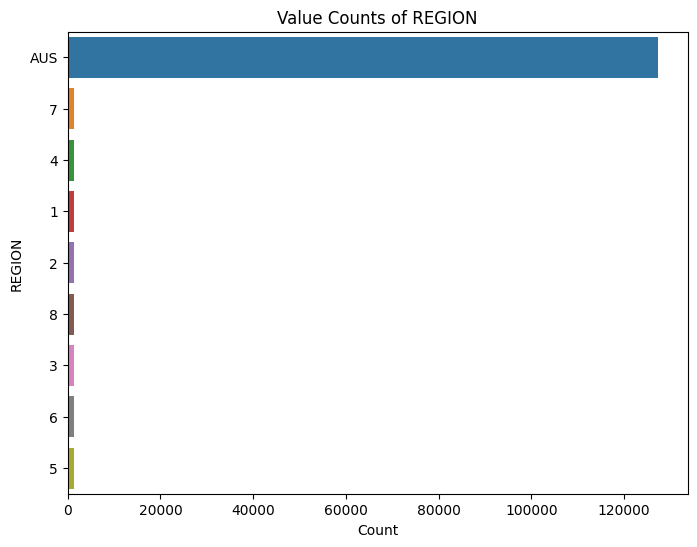


Value Counts for 'Region':
Region
Australia                       127329
Northern Territory                1408
South Australia                   1408
New South Wales                   1408
Victoria                          1408
Australian Capital Territory      1408
Queensland                        1408
Tasmania                          1408
Western Australia                 1408
Name: count, dtype: int64


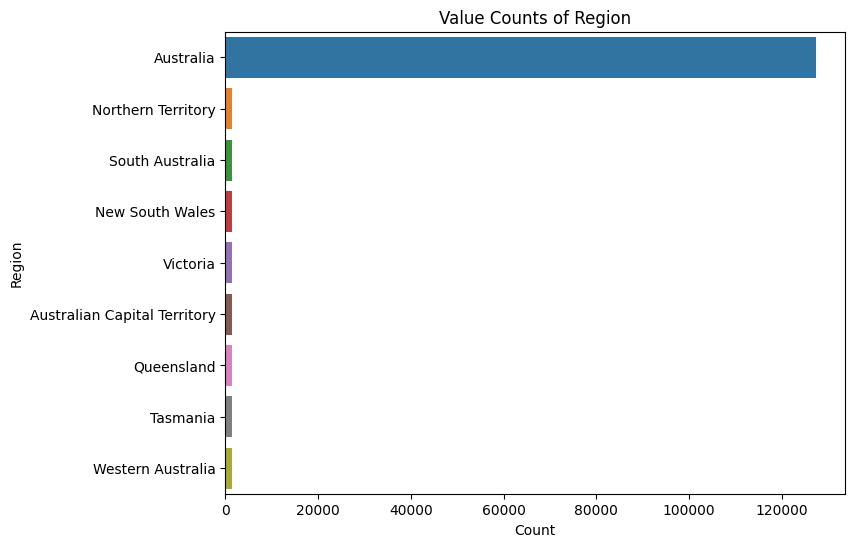


Value Counts for 'FREQ':
FREQ
Q    138593
Name: count, dtype: int64


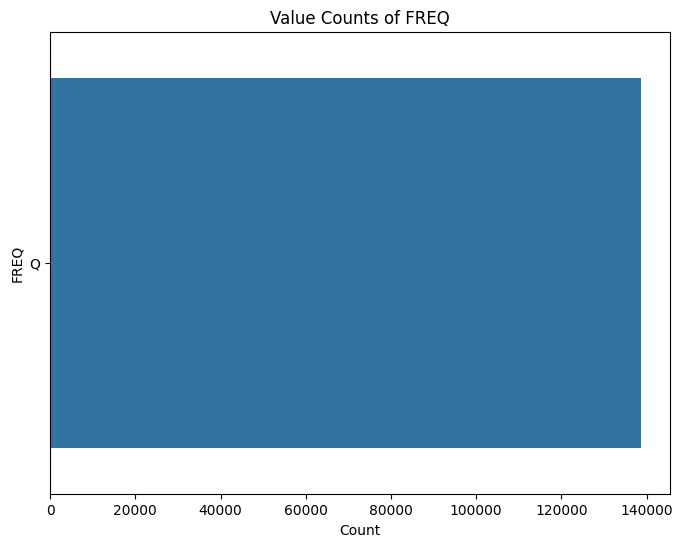


Value Counts for 'Frequency':
Frequency
Quarterly    138593
Name: count, dtype: int64


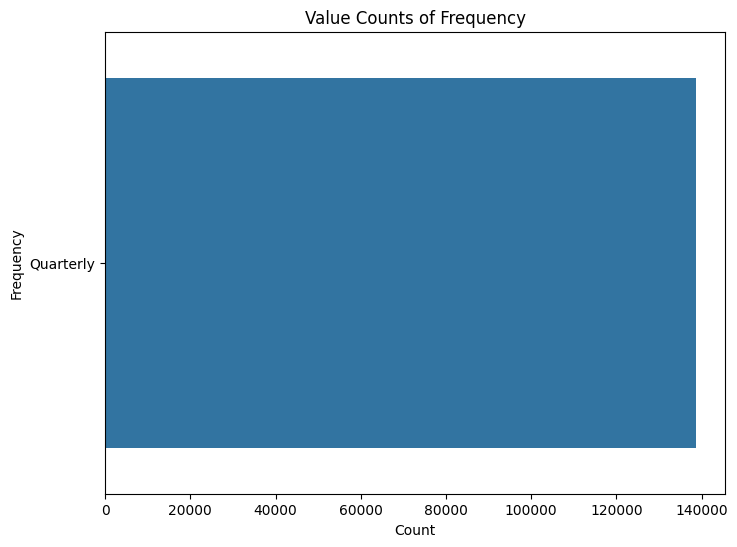


Value Counts for 'TIME_PERIOD':
TIME_PERIOD
2021-Q2    1046
2020-Q2    1046
2020-Q4    1046
2021-Q1    1046
2020-Q1    1046
           ... 
1985-Q1     403
1984-Q4     403
1984-Q3     403
1985-Q2     403
1984-Q2     403
Name: count, Length: 162, dtype: int64


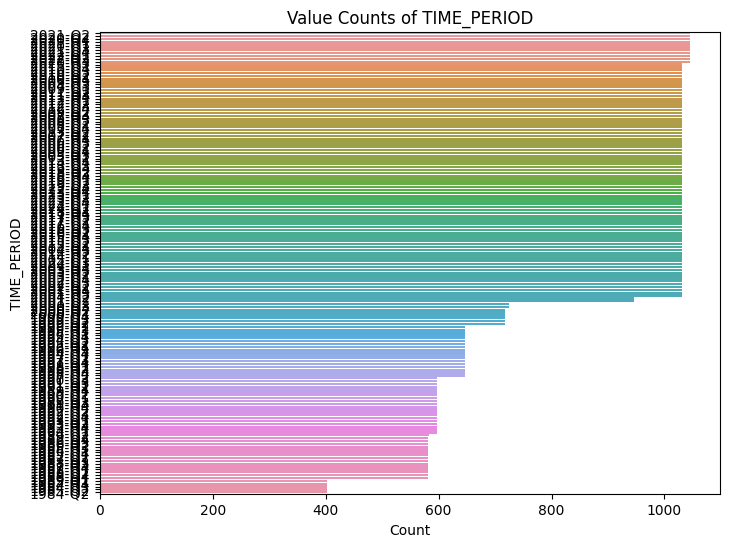


Value Counts for 'UNIT_MEASURE':
UNIT_MEASURE
PCT    68519
AUD    61488
NUM     8586
Name: count, dtype: int64


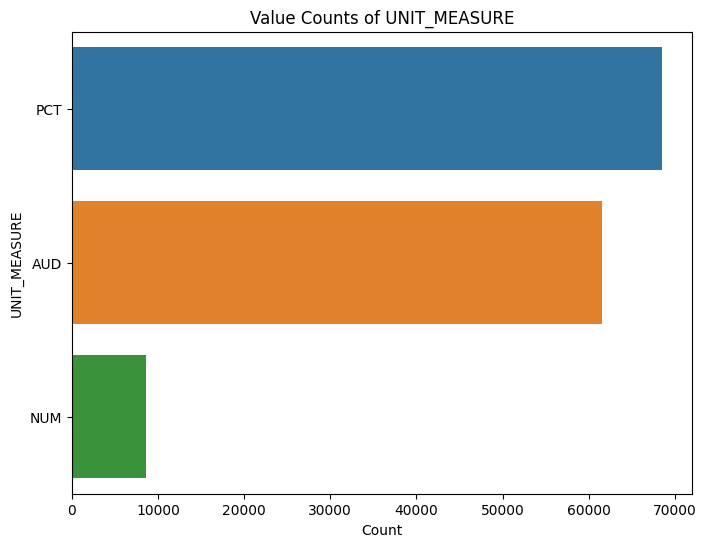


Value Counts for 'Unit of Measure':
Unit of Measure
Percent               68519
Australian Dollars    61488
Number                 8586
Name: count, dtype: int64


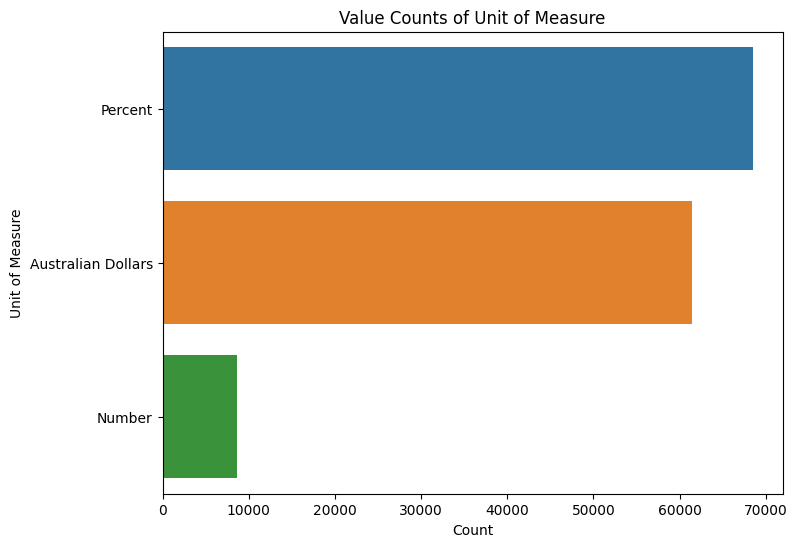


Value Counts for 'Unit of Multiplier':
Unit of Multiplier
Units       77105
Millions    61488
Name: count, dtype: int64


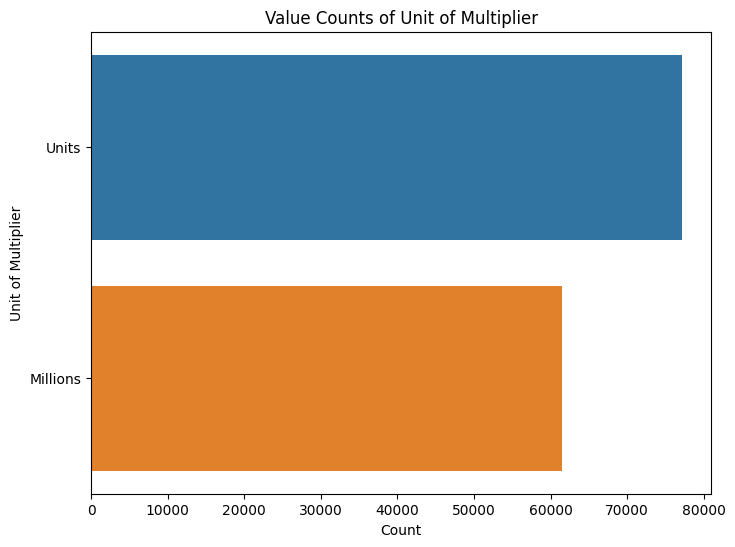

Skipping column 'OBS_STATUS' as it is not in the DataFrame.
Skipping column 'Observation Status' as it is not in the DataFrame.
Skipping column 'OBS_COMMENT' as it is not in the DataFrame.


In [13]:
# 5. Analyze Categorical Columns
print("\nAnalyzing Categorical Columns:")

# Ensure column names are stripped of extra spaces
data.columns = data.columns.str.strip()

for column in categorical_columns:
    # Check if the column exists in the DataFrame
    if column not in data.columns:
        print(f"Skipping column '{column}' as it is not in the DataFrame.")
        continue

    print(f"\nValue Counts for '{column}':")
    print(data[column].value_counts())

    # Plot counts
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f"Value Counts of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()



Correlation Analysis:
              TSEST  OBS_VALUE  UNIT_MULT
TSEST      1.000000   0.055388   0.022068
OBS_VALUE  0.055388   1.000000   0.349736
UNIT_MULT  0.022068   0.349736   1.000000


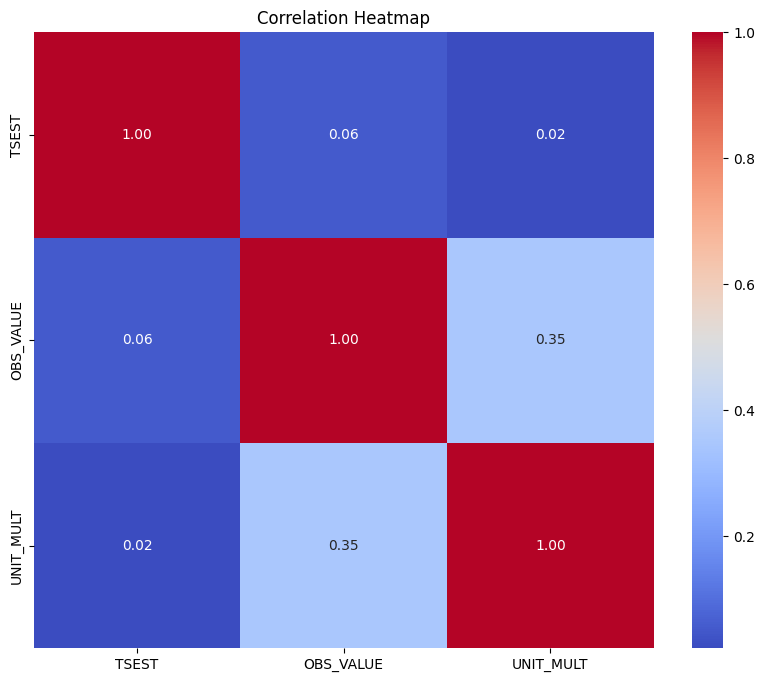

In [14]:
# 6. Correlation Analysis (Numerical Columns)
if len(numerical_columns) > 1:
    print("\nCorrelation Analysis:")
    correlation_matrix = data[numerical_columns].corr()
    print(correlation_matrix)

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


Pairplot for Selected Numerical Columns: Index(['TSEST', 'OBS_VALUE', 'UNIT_MULT'], dtype='object')


/Users/hasibullah/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


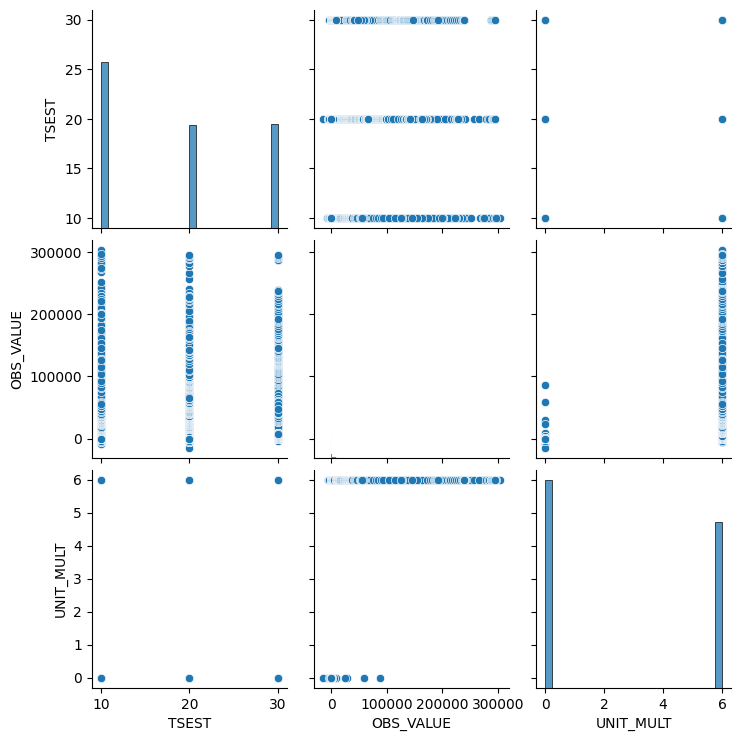

In [15]:

# 7. Relationship Between Features
# Pairplot for selected numerical columns
if len(numerical_columns) > 2:
    selected_columns = numerical_columns[:4]  # Adjust the number of columns based on preference
    print(f"\nPairplot for Selected Numerical Columns: {selected_columns}")
    sns.pairplot(data[selected_columns])
    plt.show()


Analyzing Trends Over Time:


/var/folders/q_/2tddcp750xn1_gjdp47qjfp40000gn/T/ipykernel_32021/1368922962.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TIME_PERIOD'] = pd.to_datetime(data['TIME_PERIOD'], errors='coerce')  # Convert to datetime


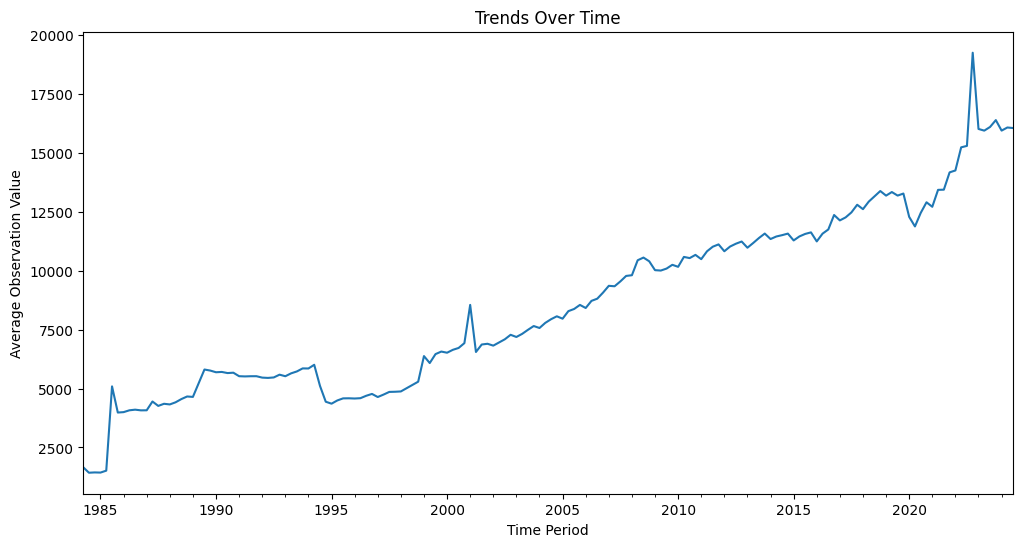

In [16]:
# 8. Trends Over Time (Time Period Analysis)
if 'TIME_PERIOD' in data.columns:
    print("\nAnalyzing Trends Over Time:")
    data['TIME_PERIOD'] = pd.to_datetime(data['TIME_PERIOD'], errors='coerce')  # Convert to datetime
    time_data = data.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
    
    # Plot trends
    plt.figure(figsize=(12, 6))
    time_data.plot()
    plt.title("Trends Over Time")
    plt.xlabel("Time Period")
    plt.ylabel("Average Observation Value")
    plt.show()

In [17]:
# 9. Data Cleaning and Final Check
print("\nFinal Dataset After Cleaning:")
print(data.info())
print("\nPreview of Cleaned Data:")
print(data.head())


Final Dataset After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   STRUCTURE           138593 non-null  object        
 1   STRUCTURE_ID        138593 non-null  object        
 2   STRUCTURE_NAME      138593 non-null  object        
 3   ACTION              138593 non-null  object        
 4   MEASURE             138593 non-null  object        
 5   Measure             138593 non-null  object        
 6   PRICE_ADJUSTMENT    138593 non-null  object        
 7   Price Adjustment    138593 non-null  object        
 8   INDUSTRY            138593 non-null  object        
 9   Industry            138593 non-null  object        
 10  SCOPE               138593 non-null  object        
 11  Business Scope      138593 non-null  object        
 12  TSEST               138593 non-null  int64         
 13

In [18]:
# 10. Export Cleaned Dataset (Optional)
cleaned_file_path = 'cleaned_ABS_QBIS.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned Dataset Saved to '{cleaned_file_path}'")


Cleaned Dataset Saved to 'cleaned_ABS_QBIS.csv'


# Processing the cleaned dataset for training LLM models
## 1: Define the Training Objective

- Text Classification: Predict labels (e.g., OBS_STATUS) from text data.
- Text Generation: Generate meaningful text based on input prompts.
- Question Answering: Provide answers based on given context.

## 2: Select Relevant Columns

- Input text (e.g., STRUCTURE_NAME, OBS_COMMENT, etc.).
- Target labels or outputs (e.g., OBS_STATUS or OBS_VALUE).